**Question 3**

**Are the most monetized artists on Spotify the ones with the most weeks on the charts?**

A statistical analysis of this question in two periods: before and after the 62nd Grammy Awards show.

**Caveats**

    1. For purposes of this question, the Grammys serve as a point in time from where to divide our data and 
        findings into pre and post-Grammy periods as detailed below. 

**Definitions** 

    1. Grammy effect: For our purposes this term is defined as the discernible impact that the airing of 
        the Grammys has on an artist's Spotify monetization.
    2. Eligibility period: Evaluation timeframe used by the Grammy awards committee for the 62nd Grammy awards 
        (1 October 2018 (Autumn 2018) to 31 August 2019 (Summer 2019). We've also included the period following 
        the airing of the Grammys in January 2020. This period is captured in the Winter 2020 data. 
        
**Methodology** The most salient points of this process. 

    1. We identified columns containing continuous data which could be used to help us answer our 
        aforementioned question. Namely, the "streams" and "weeks on charts" columns. Streams were converted 
        into monetization data using the industry standard rate of .004 cents per stream. 
        
    2. With this in mind, we created a dataframe which depicts the top-10 monetized artists during the 
        pre-Grammy period. This dataframe is found below as the "pre_gram_mon_total" dataframe. 
        
    3. We then created a dataframe which depicts the top-10 streamed artists during the 
        post-Grammy period, wherein we added the period following the airing of the Grammys to the above dataframe.  
        This dataframe is found below as the "post_gram_mon_total" dataframe.  
            
**Statistical analysis**

    1. From the "pre_gram_mon_total" and "post_gram_mon_total" dataframes mentioned above we created scatter plots 
        designed to depict a pre-Grammy and post-Grammy period. 

    2. The pre-Grammy scatter plot was designed to establish a baseline of the monetizataion vs weeks on charts 
        behavior.   
        
    3. The post-Grammy scatter plot was designed to detect changes to the aforementioned baseline scatter plot (monetization vs weeks on charts) following the airing of the Grammys. 
    
**Findings**

    1. While we can clearly observe the positive relationship between "weeks on chart" and "monetization," with 
        a correlation of .957 for our baseline period (preceding the Grammys), and a correlation of .964 in the 
        period following the Grammys, the broader point as it pertains to our original question regarding a
        discernible impact that the airing of the Grammys has on an artist's Spotify monetization, we can observe 
        a small increase in the positive correlation between our variables following the Grammys. 

In [34]:
# Imported dependencies.
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Imported data for the 62nd annual Grammy awards (herein referred to as "the Grammy awards") and created dataframe.
# The data's timeframe covers the Grammy eligibility period (autumn 2018 - summer 2019) and the month after the show. 
# The period following the show is winter 2020. 
grammy_file = ("resources/62_grammy_awards_q3.csv")
grammy_data = pd.read_csv(grammy_file)

In [36]:
# Imported Spotify data for the Grammy eligibility period and created dataframes for each season from (autumn 2018 - summer 2019).
# There is also a dataframe covering the period following the airing of the Grammy awards (winter 2020)
autumn_18_file = ("resources/regional-us-weekly-2018-10-11_q3.csv")
winter_19_file = ("resources/regional-us-weekly-2019-01-10_q3.csv")
spring_19_file = ("resources/regional-us-weekly-2019-04-11_q3.csv")
summer_19_file = ("resources/regional-us-weekly-2019-07-11_q3.csv")
winter_20_file = ("resources/regional-us-weekly-2020-02-06_q3.csv")

autumn_18_data = pd.read_csv(autumn_18_file)
autumn_18_data.insert(loc=9, column="season", value="autumn")
autumn_18_data.insert(loc=10, column="month", value=10)
autumn_18_data.insert(loc=11, column="year", value="2018")

winter_19_data = pd.read_csv(winter_19_file)
winter_19_data.insert(loc=9, column="season", value="winter")
winter_19_data.insert(loc=10, column="month", value=1)
winter_19_data.insert(loc=11, column="year", value="2019")

spring_19_data = pd.read_csv(spring_19_file)
spring_19_data.insert(loc=9, column="season", value="spring") 
spring_19_data.insert(loc=10, column="month", value=4)
spring_19_data.insert(loc=11, column="year", value="2019") 

summer_19_data = pd.read_csv(summer_19_file)
summer_19_data.insert(loc=9, column="season", value="summer")
summer_19_data.insert(loc=10, column="month", value=7)
summer_19_data.insert(loc=11, column="year", value="2019")

winter_20_data = pd.read_csv(winter_20_file)
winter_20_data.insert(loc=9, column="season", value="winter")
winter_20_data.insert(loc=10, column="month", value=2)
winter_20_data.insert(loc=11, column="year", value="2020")                       

merged_data_1 = pd.merge(autumn_18_data, winter_19_data, how="outer", 
                left_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"],
                right_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"])
merged_data_2 = pd.merge(spring_19_data, summer_19_data, how="outer", 
                left_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"],
                right_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"])

combined_merge_1 = pd.merge(merged_data_1, merged_data_2, how="outer", 
                left_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"],
                right_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"])

combined_merge_final = pd.merge(combined_merge_1, winter_20_data, how="outer", 
                left_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"],
                right_on=["rank", "uri", "artist_names", "track_name", "source", "peak_rank", "previous_rank", "weeks_on_chart", "streams", "season", "month", "year"])

In [37]:
# Converted datatime functionality to date column.
combined_merge_final['date'] = pd.to_datetime(combined_merge_final[['year','month']].assign(day=1)).dt.to_period('M')
combined_merge_final.tail()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,season,month,year,date
995,196,spotify:track:4uNV7GyGEBZzPDdetEEvhS,"Diplo, Julia Michaels, Morgan Wallen",Heartless (with Julia Michaels & Morgan Wallen),Columbia,196,-1,1,1618785,winter,2,2020,2020-02
996,197,spotify:track:0uxSUdBrJy9Un0EYoBowng,Lil Uzi Vert,20 Min,Generation Now/Atlantic,120,-1,16,1617784,winter,2,2020,2020-02
997,198,spotify:track:2otTuKRISADOYA47CmIT4W,Lil Wayne,Stop Playin With Me,"Young Money Records, Inc.",198,-1,1,1616361,winter,2,2020,2020-02
998,199,spotify:track:7zLYKWcXnYeHHWidalz7rj,Lil Mosey,Noticed,Mogul Vision/Interscope Records,20,-1,71,1616209,winter,2,2020,2020-02
999,200,spotify:track:5BJMeoCXXgbRAWfp6fTulr,"NLE Choppa, Blueface",Shotta Flow (feat. Blueface) [Remix],"NLE Choppa Entertainment, Inc.",20,-1,29,1612707,winter,2,2020,2020-02


In [38]:
# Created a dataframe of stream totals for the Grammy awards eligibility period and the month following the show. 
# streams_winter_20 column represents the period following the airing of the award show.
# dataframe is sorted by the streams_winter_20 column which represents the period following the show. 

artist_names1 = autumn_18_data.set_index("artist_names").groupby(["artist_names"])
total_streams1 = artist_names1["streams"].sum()

artist_names2 = winter_19_data.set_index("artist_names").groupby(["artist_names"])
total_streams2 = artist_names2["streams"].sum()

artist_names3 = spring_19_data.set_index("artist_names").groupby(["artist_names"])
total_streams3 = artist_names3["streams"].sum()

artist_names4 = summer_19_data.set_index("artist_names").groupby(["artist_names"])
total_streams4 = artist_names4["streams"].sum()

artist_names5 = winter_20_data.set_index("artist_names").groupby(["artist_names"])
total_streams5 = artist_names5["streams"].sum()

streams_df = pd.DataFrame({
    "streams_autumn_18": total_streams1, 
    "streams_winter_19": total_streams2, 
    "streams_spring_19": total_streams3,
    "streams_summer_19": total_streams4, 
    "streams_winter_20": total_streams5
})


streams_df = streams_df.sort_values(by="streams_winter_20", ascending=False).head(10)
streams_df

,streams_autumn_18,streams_winter_19,streams_spring_19,streams_summer_19,streams_winter_20
artist_names,,,,,
Billie Eilish,1601546.0,16714498.0,80123067.0,27379251.0,26168541.0
Roddy Ricch,NaN,NaN,1645494.0,NaN,19937887.0
Juice WRLD,19469233.0,17405149.0,25621580.0,10448726.0,17785956.0
DaBaby,NaN,NaN,1939370.0,8223158.0,13586095.0
Post Malone,10331522.0,22784434.0,14262488.0,8549152.0,13528938.0
Lil Wayne,18085825.0,NaN,NaN,NaN,12514518.0
"Future, Drake",NaN,NaN,NaN,NaN,12210480.0
Harry Styles,NaN,NaN,NaN,NaN,11736207.0
Arizona Zervas,NaN,NaN,NaN,NaN,10726258.0


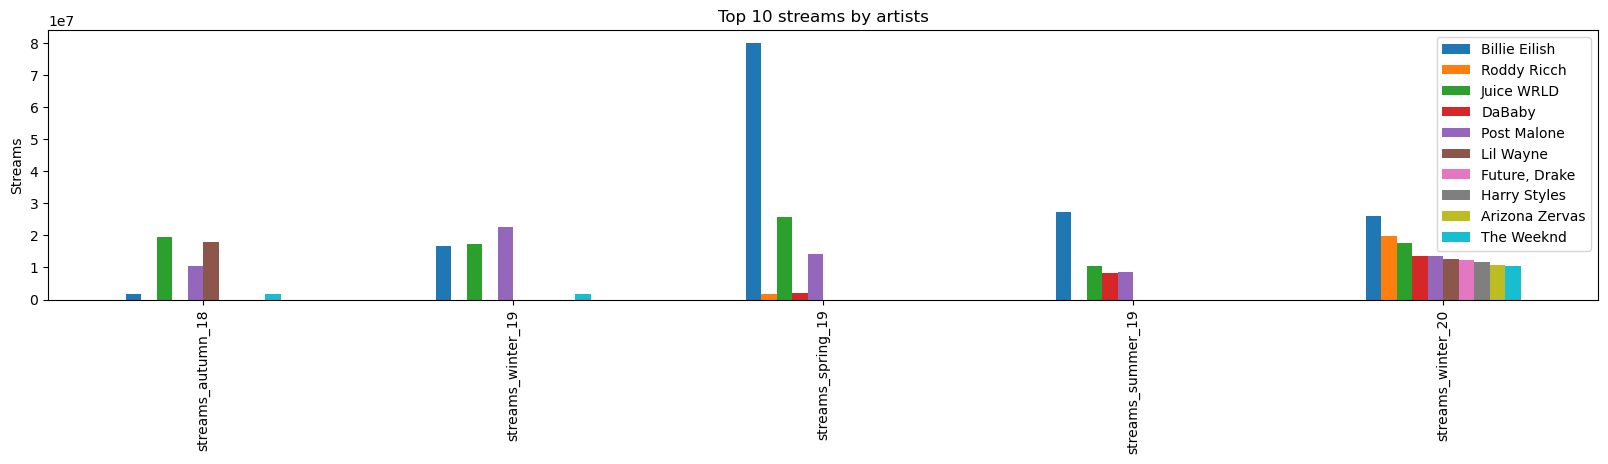

In [39]:
# Bar chart displays most streamed artists during the period following the grammy awards (on the far right).
# also displays how those artists performed (streamwise during the preceding eligibility period).
transposed_streams_df = streams_df.transpose()
stream_plot = transposed_streams_df.plot(kind="bar", figsize=(20,3.5)).legend(loc='best')
plt.ylabel("Streams")
plt.title("Top 10 streams by artists")
# plt.savefig("resources/most_streamed_entire_period_q3.png", bbox_inches="tight")
plt.show()

**Observation:** In order to obtain an initial snapshot of Spotify stream behavior during the eligibility period, as well as the post-Grammy period (Winter 2020). Of note, the above bar chart is sorted by the most streamed artists during the post-Grammy period. From this visualization we can observe a few constants throughout all five periods, of these constants-Billie Eilish, Juice WRLD, Post Malone-there were not significant changes to their streams following the award show. 

In [40]:
# Scatter plot function 

def lin_reg(x_variable, y_variable, x_label, y_label, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_variable, y_variable)

    # Acquire regression value
    regress_values = x_variable * slope + intercept
    
    # Create line equation 
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_variable, y_variable, alpha = 0.75, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"Scatterplot determining relationship between - {x_label} vs {y_label}")
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"R-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_variable,y_variable)
    print(f"Correlation between both factors is {round(correlation[0],3)}")
    return plt.plot(x_variable,regress_values,"r-")

In [41]:
# dataframe which depicts the top-10 monetized artists during the pre-Grammy period.
artist_names_plot_2 = combined_merge_1.set_index("artist_names").groupby(["artist_names"])
tracks_plot_2 = artist_names_plot_2["track_name"].unique() 
weeks_on_chart_plot_2 = artist_names_plot_2["weeks_on_chart"].count() 
total_streams_plot_2 = artist_names_plot_2["streams"].sum()
monetization_plot_2 = artist_names_plot_2["streams"].sum() * .004

pre_gram_mon_total = pd.DataFrame({
#     "date": date,
#     "tracks": tracks,
    "weeks_on_chart": weeks_on_chart_plot_2, 
#     "total_streams": total_streams_plot_2,
    "monetization": monetization_plot_2
})

pre_gram_mon_total = pre_gram_mon_total.sort_values(by="monetization", ascending=False)

pre_gram_mon_total.head(10)

,weeks_on_chart,monetization
artist_names,,
Billie Eilish,35,503273.448
Khalid,27,355441.948
XXXTENTACION,26,322528.288
Juice WRLD,26,291778.752
Ariana Grande,18,234062.976
Post Malone,14,223710.384
Travis Scott,15,197584.548
Drake,17,184082.824
"Lil Baby, Gunna",9,157970.216


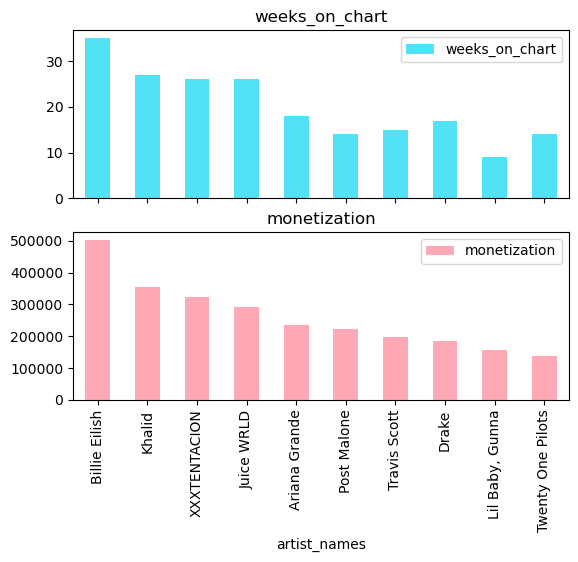

In [42]:
# Bar chart which depicts the top-10 monetized artists and their time spent on the Spotify charts 
# during the pre-Grammy period.
plotted_pre_gram_mon_total = pre_gram_mon_total.head(10)
transposed_plotted_pre_gram_mon_total = plotted_pre_gram_mon_total.transpose()

axes = plotted_pre_gram_mon_total.plot.bar(rot=0, subplots=True, color=["#51E2F5", "#FFA8B6"])
plt.xticks(rotation="vertical")
axes[1].legend(loc="best")

# plt.savefig("resources/most_monetized_pre_gram_q3.png", bbox_inches="tight")
plt.show()

R-squared is: 0.9161804182248113
Correlation between both factors is 0.957


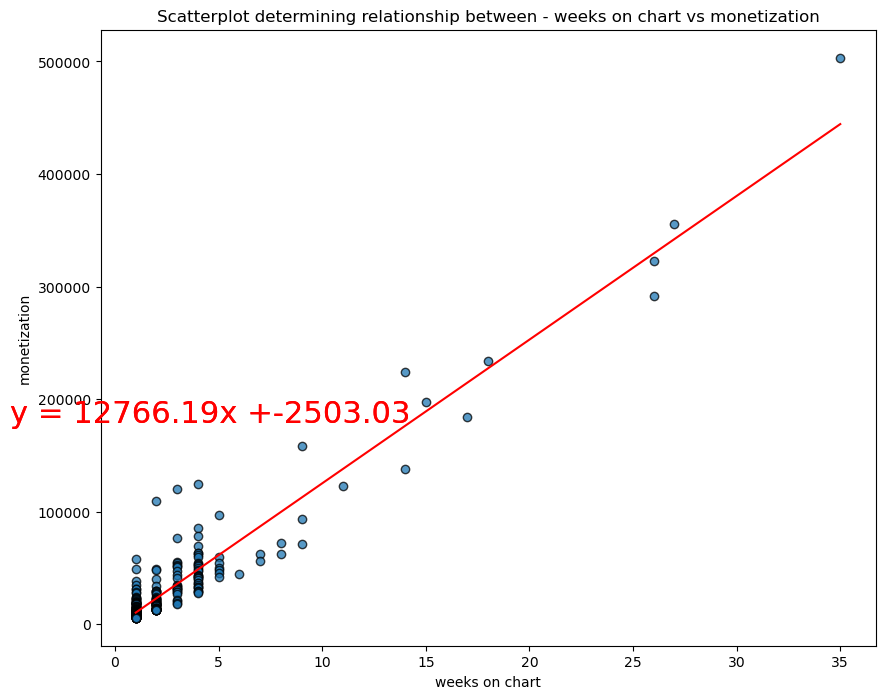

In [43]:
# Scatterplot which depicts the top-10 monetized artists and their "weeks on chart" during the pre-Grammy period.
# This serves as our data baseline
pre_gram_x_var = pre_gram_mon_total["weeks_on_chart"]
pre_gram_y_var = pre_gram_mon_total["monetization"]

lin_reg(pre_gram_x_var, pre_gram_y_var, "weeks on chart", "monetization", (0, 0))
# plt.savefig("resources/scatter_plot_pre-gram_q3.png", bbox_inches="tight")
plt.show()

**Observation:*** We can clearly observe the positive relationship between "weeks on chart" and "monetization," with a correlation of .957 for our baseline period (preceding the Grammys). This scatter plot sets our baseline of stream behavior prior to inclusion of the post Grammy period found in our subsequent scatter plot. 

**Discussion about the linear relationship:** 

In [44]:
# dataframe which depicts the top-10 monetized artists during the post-Grammy period.
artist_names_plot_1 = combined_merge_final.set_index("artist_names").groupby(["artist_names"])
tracks_plot_1 = artist_names_plot_1["track_name"].unique() 
weeks_on_chart_plot_1 = artist_names_plot_1["weeks_on_chart"].count() 
total_streams_plot_1 = artist_names_plot_1["streams"].sum()
monetization_plot_1 = artist_names_plot_1["streams"].sum() * .004

post_gram_mon_total = pd.DataFrame({
#     "date": date,
#     "tracks": tracks,
    "weeks_on_chart": weeks_on_chart_plot_1, 
#     "total_streams": total_streams_plot_1,
    "monetization": monetization_plot_1
})

post_gram_mon_total = post_gram_mon_total.sort_values(by="monetization", ascending=False)
post_gram_mon_total.head(10)

,weeks_on_chart,monetization
artist_names,,
Billie Eilish,44,607947.612
Khalid,29,373909.384
Juice WRLD,33,362922.576
XXXTENTACION,30,354287.144
Post Malone,18,277826.136
Ariana Grande,20,249775.636
Travis Scott,18,229763.836
Drake,17,184082.824
"Lil Baby, Gunna",10,167335.772


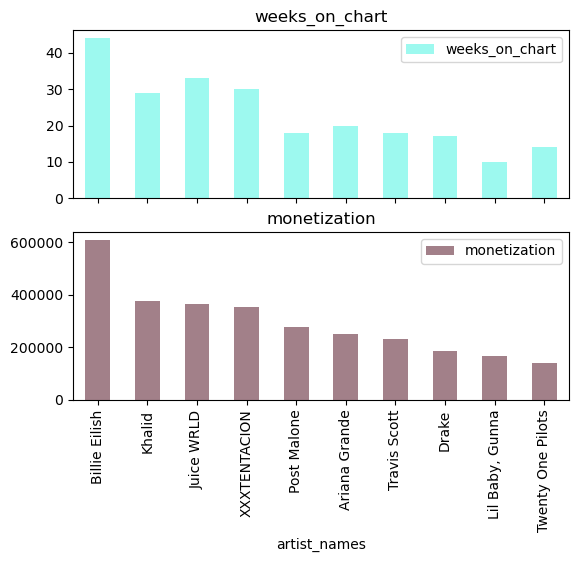

In [45]:
# Bar chart which depicts the top-10 monetized artists and their time spent on the Spotify charts 
# during the post-Grammy period.
plotted_post_gram_mon_total = post_gram_mon_total.head(10)
transposed_plotted_post_gram_mon_total = plotted_post_gram_mon_total.transpose()

axes = plotted_post_gram_mon_total.plot.bar(rot=0, subplots=True, color=["#9DF9EF", "#A28089"])
plt.xticks(rotation="vertical")
axes[1].legend(loc="best")

# plt.savefig("resources/most_monetized_post_gram_q3.png", bbox_inches="tight")
plt.show()

R-squared is: 0.9289657907770454
Correlation between both factors is 0.964


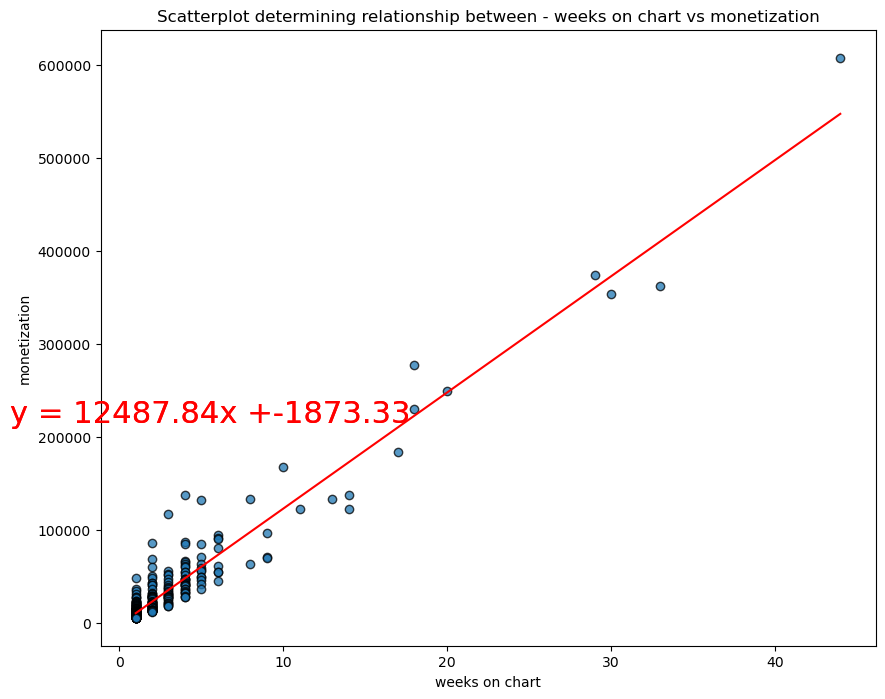

In [46]:
# Scatterplot which depicts the top-10 monetized artists and their "weeks on chart" during the post-Grammy period.
# This provides any changes to the aforementioned data baseline following the airing of the Grammy awards. 

post_gram_x_var = post_gram_mon_total["weeks_on_chart"]
post_gram_y_var = post_gram_mon_total["monetization"]

lin_reg(post_gram_x_var, post_gram_y_var, "weeks on chart", "monetization", (0, 0))
# plt.savefig("resources/scatter_plot_post-gram_q3.png", bbox_inches="tight")
plt.show()

**Observation:*** While we can clearly observe the positive relationship between "weeks on chart" and "monetization," with a correlation of .957 for our baseline period (preceding the Grammys), and a correlation of .964 in the 
period following the Grammys, the broader point as it pertains to our original question regarding a discernible impact that the airing of the Grammys has on an artist's Spotify monetization, we can observe a small increase in the positive correlation between our variables following the Grammys. 